In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/USER/Desktop/DSA/Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
data.shape

(178, 13)

In [8]:
data.isnull().sum() # to check the null value

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
#there is no null values in the dataset

### KMean method

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


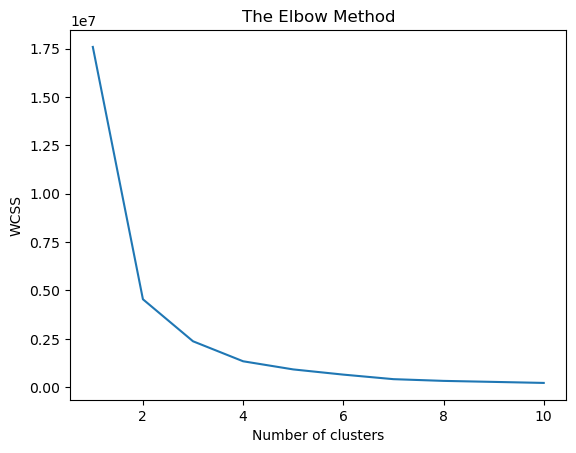

In [25]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# to plot the graph    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# by KMean method we get number of cluster is 4

In [16]:
#the elbow is at 4 ,so optimum value for no of clusters is 4, here we create model using 4 clusters
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)#kmeans++ to avoid random intialization trap
y_kmeans=kmeans.fit_predict(data)

In [17]:
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

### Silhouette Score

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
sil_avg=silhouette_score(data,y_kmeans) 

In [32]:
sil_avg

0.5572288268257268

In [ ]:
## here we get that the created objects are 55% matching to its own cluster.

# Dendrogram

In [18]:
import scipy.cluster.hierarchy as sch

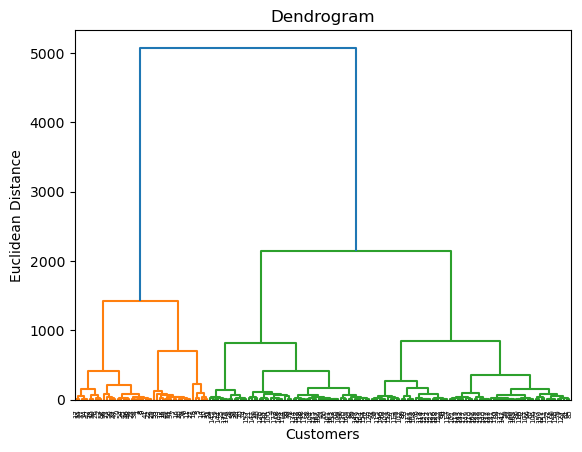

In [33]:
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [34]:
# by using Dendrogram we get the optimum clusters as 2.

### Agglomerative Hierarchical Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering # import necessary libraries

In [36]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward') # creating model using 2 clusters

y_hc=hc.fit_predict(data)   # model prediction

In [37]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

### Silhouette Score

In [60]:
sil_avg1=silhouette_score(data,y_hc) # to check the silhouette score which explains about the quality of the cluster that we created

In [61]:
sil_avg1

0.6587292996216912

In [41]:
## here we get that the created objects are 65% matching to its own cluster.

### DBSCAN Clustering

In [44]:
# to apply DBSCAN method we need to find the two parameters Epsilon(Eps) and minpoints. Since our data is two-dimensional, we shall use the default value of 4 as our MinPoint parameter.


In [48]:
#Epsilon (Eps): To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.

In [50]:
#Compute data proximity from each other using Nearest Neighbours

In [49]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(data) # fitting the data to the object
distances,indices=nbrs.kneighbors(data) # finding the nearest neighbours

In [51]:
# Sorting and plot the distances between the data points

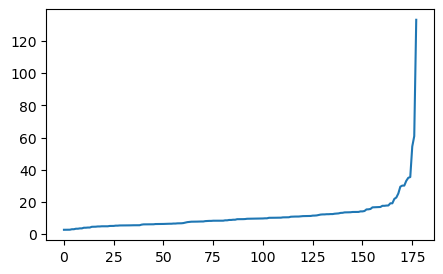

In [52]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [53]:
# From the above plot, we note the maximum curvature of the curve is about 30, and thus we picked our Eps as 30.

In [55]:
# here our parameters are Minpoint=4 & Eps=30

##### Implementing the DBSCAN model

In [56]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 30, min_samples = 4).fit(data) # fitting the model
labels = dbscan.labels_ # getting the labels

In [58]:
labels

array([ 0,  0, -1, -1,  1, -1,  2,  2,  0,  0, -1,  2,  2, -1, -1,  2,  2,
        0, -1,  3,  1,  1,  0,  0,  3,  3, -1,  2,  3,  0,  2, -1,  0, -1,
        0, -1,  3,  0,  0,  1,  1,  0,  0,  1,  3,  0,  0,  0,  0,  2, -1,
        2, -1, -1,  0,  0,  0,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  3,  1,  1,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  3,  1], dtype=int64)

### Silhouette Score

In [62]:
sil_avg2=silhouette_score(data,labels)

In [63]:
sil_avg2

0.4201435776668874

In [64]:
## here we get that the created objects are 42% matching to its own cluster.

# result:-

here i apply KMeans clustering,Agglomerative Hierarchical Clustering,DBSCAN clustering methods to the dataset.after creating the model with each method i check the silhouette score . and  get the results as 

KMeans clustering =0.5572288268257268
Agglomerative Hierarchical Clustering=0.6587292996216912
DBSCAN clustering=0.4201435776668874

Agglomerative Hierarchical clustering method shows the hieghest score. so we can say that in this case ,this is the method of clustering